In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/PORTO_SEGURO/test.csv')

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/PORTO_SEGURO/train.csv')

In [ ]:
df_train


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221370,553087,0,0,1,2,0,0,1,0,0,...,5.0,0.0,3.0,11.0,0.0,1.0,1.0,0.0,0.0,0.0
221371,553092,0,1,2,1,1,0,0,1,0,...,9.0,1.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
221372,553093,0,5,1,2,1,0,0,0,1,...,5.0,1.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0
221373,553095,0,0,1,2,0,0,1,0,0,...,5.0,3.0,2.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
df_train.drop('id',axis = 1,inplace = True)

In [ ]:
px.histogram(df_train,x = 'target',color = 'target')

In [ ]:
print(8072/221303*100)

3.647487833422954


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221375 entries, 0 to 221374
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              221375 non-null  int64  
 1   target          221375 non-null  int64  
 2   ps_ind_01       221375 non-null  int64  
 3   ps_ind_02_cat   221375 non-null  int64  
 4   ps_ind_03       221375 non-null  int64  
 5   ps_ind_04_cat   221375 non-null  int64  
 6   ps_ind_05_cat   221375 non-null  int64  
 7   ps_ind_06_bin   221375 non-null  int64  
 8   ps_ind_07_bin   221375 non-null  int64  
 9   ps_ind_08_bin   221375 non-null  int64  
 10  ps_ind_09_bin   221375 non-null  int64  
 11  ps_ind_10_bin   221375 non-null  int64  
 12  ps_ind_11_bin   221375 non-null  int64  
 13  ps_ind_12_bin   221375 non-null  int64  
 14  ps_ind_13_bin   221375 non-null  int64  
 15  ps_ind_14       221375 non-null  int64  
 16  ps_ind_15       221375 non-null  int64  
 17  ps_ind_16_

In [ ]:
stats = df_train.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
id,221375.0,276779.210814,159589.932906,7.000000,138830.000000,277095.000000,415043.000000,553099.000000
target,221375.0,0.036463,0.187440,0.000000,0.000000,0.000000,0.000000,1.000000
ps_ind_01,221375.0,1.898241,1.983936,0.000000,0.000000,1.000000,3.000000,7.000000
ps_ind_02_cat,221375.0,1.358306,0.663279,-1.000000,1.000000,1.000000,2.000000,4.000000
ps_ind_03,221375.0,4.423883,2.702053,0.000000,2.000000,4.000000,6.000000,11.000000
ps_ind_04_cat,221375.0,0.417062,0.493331,-1.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_05_cat,221375.0,0.405800,1.351143,-1.000000,0.000000,0.000000,0.000000,6.000000
ps_ind_06_bin,221375.0,0.393726,0.488576,0.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_07_bin,221375.0,0.256149,0.436506,0.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_08_bin,221375.0,0.163713,0.370016,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
nan_cols = stats[stats['min'] == -1].index
nan_cols
# since -1 represent NaN values so I am converting -1 to NaN

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat',
       'ps_car_07_cat', 'ps_car_09_cat', 'ps_car_11', 'ps_car_14'],
      dtype='object')

In [ ]:
for nan_col in nan_cols:
    df_train.loc[df_train[nan_col] == -1, nan_col] = np.nan

In [ ]:
df_train.isna().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat         71
ps_ind_03              0
ps_ind_04_cat         28
ps_ind_05_cat       2167
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03          39953
ps_car_01_cat         39
ps_car_02_cat          3
ps_car_03_cat     152966
ps_car_04_cat          1
ps_car_05_cat      98957
ps_car_06_cat          1
ps_car_07_cat       4167
ps_car_08_cat          1
ps_car_09_cat        210
ps_car_10_cat          1
ps_car_11_cat          1
ps_car_11              3
ps_car_12              1
ps_car_13              1
ps_car_14          15770
ps_car_15              1
ps_calc_01             1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df,cv_df = train_test_split(df_train,test_size = 0.2,random_state = 42)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
model_xgb = XGBClassifier(scale_pos_weight= 25 , n_estimators = 100,learning_rate = 0.1)

In [ ]:
model_xgb.fit(train_df.drop(['target',],axis = 1),train_df['target'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
train_pred = model_xgb.predict(train_df.drop(['target'],axis = 1))

In [ ]:
cv_pred = model_xgb.predict(cv_df.drop(['target'],axis = 1))

In [ ]:
print("accuracy on train set is =  "+str(accuracy_score(train_df['target'],train_pred)))

accuracy on train set is =  0.7800282326369283


In [ ]:
print("accuracy on cv set is =  " +str(accuracy_score(cv_df['target'],cv_pred)))

accuracy on cv set is =  0.7551214003387916


In [ ]:
print("classification report for cv set is =  " +str(classification_report(cv_df['target'],cv_pred)))

classification report for cv set is =                precision    recall  f1-score   support

           0       0.97      0.77      0.86     42619
           1       0.06      0.38      0.10      1656

    accuracy                           0.76     44275
   macro avg       0.51      0.57      0.48     44275
weighted avg       0.94      0.76      0.83     44275



In [ ]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
     assert( len(actual) == len(pred) )
     all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float64)
     all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
     totalLosses = all[:,0].sum()
     giniSum = all[:,0].cumsum().sum() / totalLosses

     giniSum -= (len(actual) + 1) / 2.
     return giniSum / len(actual)

def gini_normalized(a, p):
     return gini(a, p) / gini(a, a)

def test_gini():
     def fequ(a,b):
         return abs( a -b) < 1e-6
     def T(a, p, g, n):
         assert( fequ(gini(a,p), g) )
         assert( fequ(gini_normalized(a,p), n) )
     T([1, 2, 3], [10, 20, 30], 0.111111, 1)
     T([1, 2, 3], [30, 20, 10], -0.111111, -1)
     T([1, 2, 3], [0, 0, 0], -0.111111, -1)
     T([3, 2, 1], [0, 0, 0], 0.111111, 1)
     T([1, 2, 4, 3], [0, 0, 0, 0], -0.1, -0.8)
     T([2, 1, 4, 3], [0, 0, 2, 1], 0.125, 1)
     T([0, 20, 40, 0, 10], [40, 40, 10, 5, 5], 0, 0)
     T([40, 0, 20, 0, 10], [1000000, 40, 40, 5, 5], 0.171428,
       0.6)
     T([40, 20, 10, 0, 0], [40, 20, 10, 0, 0], 0.285714, 1)
     T([1, 1, 0, 1], [0.86, 0.26, 0.52, 0.32], -0.041666,
       -0.333333)

In [ ]:
gini_normalized(cv_df['target'],cv_pred)

0.14713403209858658

### FILTER METHODS

# Variance threshold
(Removes all low variance features)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
var_thres = VarianceThreshold(threshold = 0.05)

In [ ]:
data = df_train.copy()

In [ ]:
data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221370,553087,0,0,1.0,2,0.0,0.0,1,0,0,...,5.0,0.0,3.0,11.0,0.0,1.0,1.0,0.0,0.0,0.0
221371,553092,0,1,2.0,1,1.0,0.0,0,1,0,...,9.0,1.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
221372,553093,0,5,1.0,2,1.0,0.0,0,0,1,...,5.0,1.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0
221373,553095,0,0,1.0,2,0.0,0.0,1,0,0,...,5.0,3.0,2.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
var_thres.fit(data)

VarianceThreshold(threshold=0.05)

In [ ]:
constant_columns = [column for column in data.columns if column not in data.columns[var_thres.get_support()]]
print(len(constant_columns))

11


In [ ]:
constant_columns.remove('target')

In [ ]:
data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221370,553087,0,0,1.0,2,0.0,0.0,1,0,0,...,5.0,0.0,3.0,11.0,0.0,1.0,1.0,0.0,0.0,0.0
221371,553092,0,1,2.0,1,1.0,0.0,0,1,0,...,9.0,1.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
221372,553093,0,5,1.0,2,1.0,0.0,0,0,1,...,5.0,1.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0
221373,553095,0,0,1.0,2,0.0,0.0,1,0,0,...,5.0,3.0,2.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
df_train

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221370,553087,0,0,1.0,2,0.0,0.0,1,0,0,...,5.0,0.0,3.0,11.0,0.0,1.0,1.0,0.0,0.0,0.0
221371,553092,0,1,2.0,1,1.0,0.0,0,1,0,...,9.0,1.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
221372,553093,0,5,1.0,2,1.0,0.0,0,0,1,...,5.0,1.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0
221373,553095,0,0,1.0,2,0.0,0.0,1,0,0,...,5.0,3.0,2.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
train_df,cv_df = train_test_split(data.drop(constant_columns,axis = 1),test_size = 0.2,random_state = 42)

In [ ]:
train_df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
198820,496797,0,4,1.0,2,1.0,0.0,0,1,0,...,7.0,0.0,4.0,10.0,0.0,1.0,1.0,0.0,0.0,0.0
40245,100903,0,1,2.0,2,0.0,0.0,1,0,0,...,5.0,0.0,2.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0
202781,506785,0,0,2.0,1,1.0,0.0,0,0,1,...,8.0,1.0,4.0,10.0,0.0,1.0,0.0,0.0,1.0,0.0
70768,177075,0,1,2.0,3,1.0,0.0,0,1,0,...,6.0,2.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
171914,429651,1,2,1.0,5,1.0,0.0,0,0,1,...,5.0,1.0,3.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,299764,0,1,1.0,8,0.0,0.0,0,0,1,...,5.0,1.0,2.0,6.0,0.0,1.0,1.0,0.0,0.0,1.0
103694,259591,0,1,2.0,2,1.0,0.0,0,1,0,...,8.0,1.0,3.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0
131932,329659,0,7,4.0,11,1.0,0.0,0,1,0,...,7.0,1.0,3.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0
146867,367013,0,2,2.0,2,0.0,0.0,0,0,1,...,6.0,1.0,1.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
model_xgb.fit(train_df.drop('target',axis =1),train_df['target'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
train_pred = model_xgb.predict(train_df.drop('target',axis=1))

In [ ]:
cv_pred = model_xgb.predict(cv_df.drop('target',axis=1))

In [ ]:
print("accuracy on train set is =  "+str(accuracy_score(train_df['target'],train_pred)))

accuracy on train set is =  0.7800282326369283


In [ ]:
print("accuracy on cv set is =  " +str(accuracy_score(cv_df['target'],cv_pred)))

accuracy on cv set is =  0.7523884810841333


In [ ]:
print("classification report for cv set is =  " +str(classification_report(cv_df['target'],cv_pred)))

classification report for cv set is =                precision    recall  f1-score   support

           0       0.97      0.77      0.86     42619
           1       0.06      0.38      0.10      1656

    accuracy                           0.75     44275
   macro avg       0.51      0.57      0.48     44275
weighted avg       0.94      0.75      0.83     44275



In [ ]:
gini_normalized(cv_df['target'],cv_pred)

0.14345635006862847

# CORRELATION COEFFECIENT

<Axes: >

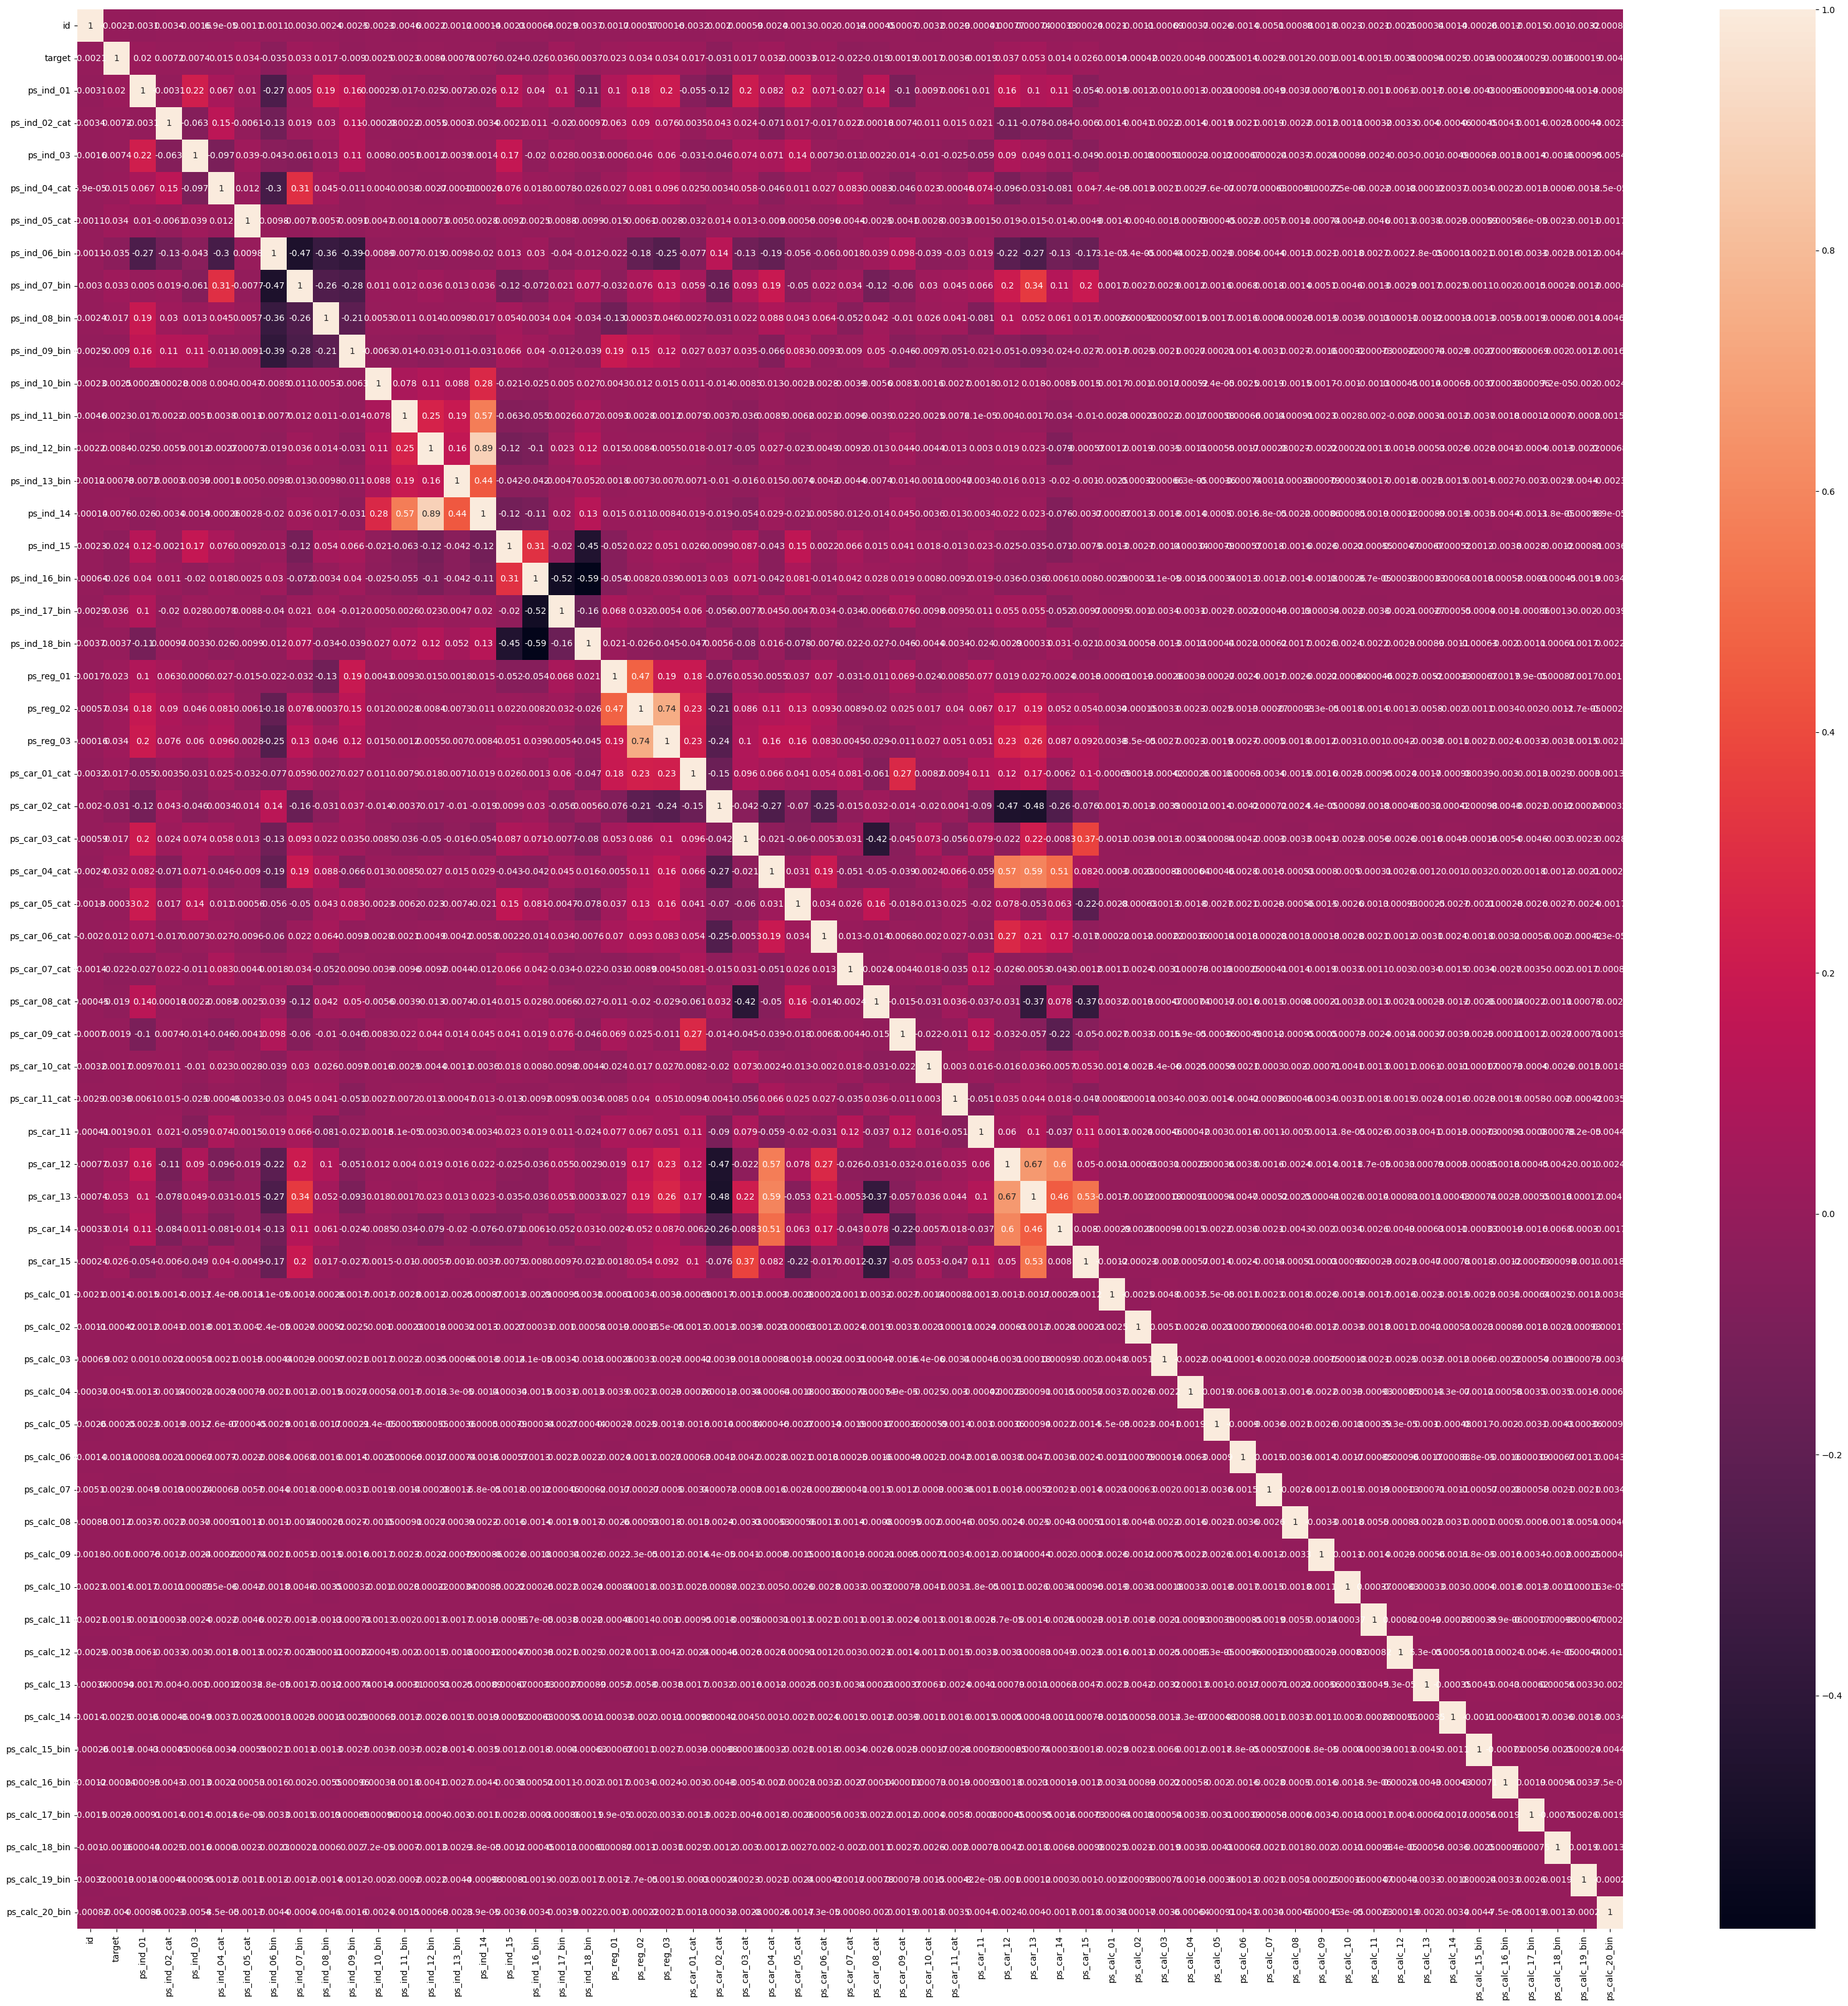

In [ ]:
plt.figure(figsize = (40,40))
sns.heatmap(df_train.corr(),annot = True)


In [ ]:
def correlation(dataset, threshold):
    """
    This function calculates the correlation between features in a dataset and returns a set of features that are highly correlated.

    Args:
        dataset (pd.DataFrame): The dataset to analyze.
        threshold (float): The threshold for correlation coefficient.

    Returns:
        set: A set of features that are highly correlated.
    """
    col_corr = set()  # Initialize col_corr as a set
    corr_matrix = dataset.corr()  # Calculate the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # Get the column name
                col_corr.add(colname)  # Add the column name to the set
    return col_corr

In [ ]:
corr_features = correlation(df_train,0.7)
len(set(corr_features))

2

In [ ]:
print(corr_features)

{'ps_ind_14', 'ps_reg_03'}


In [ ]:
# since only two featues have correlation greater than 0.7 this technique doesn't seem useful

# ANOVA F-test

works best when target column has more than 2 categorical values

doesn't accept NaN values

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [ ]:
data = df_train.dropna(axis = 0)

In [ ]:
sel = SelectKBest(f_classif,k = 30 ).fit(data.drop(['target'],axis = 1),data['target'])

In [ ]:
cols_drop = data.drop(['target'],axis = 1).columns[sel.get_support()]

In [ ]:
cols_drop

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat',
       'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin',
       'ps_ind_12_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_12',
       'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_10', 'ps_calc_13'],
      dtype='object')

In [ ]:
data = data.drop(cols_drop,axis = 1)

In [ ]:
data

,id,target,ps_ind_02_cat,ps_ind_10_bin,ps_ind_11_bin,ps_ind_13_bin,ps_ind_18_bin,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,...,ps_calc_09,ps_calc_11,ps_calc_12,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
3,16,0,1.0,0,0,0,0,3.0,1.0,104.0,...,4.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
7,22,0,1.0,0,0,0,0,2.0,1.0,30.0,...,1.0,7.0,1.0,6.0,1.0,0.0,1.0,0.0,1.0,0.0
9,28,1,1.0,0,0,0,1,2.0,1.0,104.0,...,1.0,3.0,5.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0
13,43,0,1.0,0,0,0,0,2.0,1.0,104.0,...,3.0,2.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
17,58,0,1.0,0,0,0,0,2.0,1.0,104.0,...,1.0,9.0,1.0,9.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221360,553060,1,2.0,0,0,0,0,2.0,1.0,32.0,...,1.0,9.0,2.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0
221361,553064,0,2.0,0,0,0,0,2.0,1.0,92.0,...,3.0,10.0,2.0,9.0,0.0,1.0,1.0,1.0,0.0,0.0
221364,553073,0,1.0,0,0,0,1,2.0,1.0,89.0,...,1.0,7.0,0.0,8.0,0.0,1.0,0.0,1.0,1.0,0.0
221366,553076,0,1.0,0,0,0,0,2.0,1.0,103.0,...,1.0,4.0,3.0,10.0,0.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
train_df,cv_df = train_test_split(data,test_size = 0.2,random_state = 42)

In [ ]:
train_df

,id,target,ps_ind_02_cat,ps_ind_10_bin,ps_ind_11_bin,ps_ind_13_bin,ps_ind_18_bin,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,...,ps_calc_09,ps_calc_11,ps_calc_12,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
162758,406852,0,1.0,0,0,0,0,2.0,1.0,94.0,...,1.0,5.0,0.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0
71781,179537,0,2.0,0,0,0,0,2.0,1.0,6.0,...,0.0,1.0,1.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0
41190,103257,0,1.0,0,0,0,0,2.0,1.0,65.0,...,3.0,4.0,3.0,12.0,1.0,0.0,1.0,0.0,0.0,0.0
211769,529061,0,2.0,0,0,0,0,2.0,1.0,103.0,...,1.0,5.0,0.0,7.0,0.0,1.0,1.0,0.0,0.0,1.0
187184,467920,0,1.0,0,0,0,0,2.0,1.0,87.0,...,1.0,8.0,1.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53456,134189,0,4.0,0,0,0,0,2.0,1.0,104.0,...,5.0,6.0,0.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0
212463,530838,0,1.0,0,0,0,0,2.0,1.0,93.0,...,1.0,7.0,2.0,8.0,0.0,1.0,1.0,1.0,0.0,1.0
181032,452478,0,2.0,0,0,0,0,2.0,1.0,104.0,...,1.0,5.0,0.0,8.0,1.0,0.0,1.0,0.0,0.0,1.0
4156,10671,0,1.0,0,0,0,1,2.0,1.0,47.0,...,2.0,1.0,2.0,6.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
model_xgb.fit(train_df.drop(['target',],axis = 1),train_df['target'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
train_pred = model_xgb.predict(train_df.drop(['target'],axis = 1))

In [ ]:
cv_pred = model_xgb.predict(cv_df.drop(['target'],axis = 1))

In [ ]:
print("accuracy on train set is =  "+str(accuracy_score(train_df['target'],train_pred)))

accuracy on train set is =  0.7336013939150248


In [ ]:
print("accuracy on cv set is =  " +str(accuracy_score(cv_df['target'],cv_pred)))

accuracy on cv set is =  0.672885172081055


In [ ]:
print("classification report for cv set is =  " +str(classification_report(cv_df['target'],cv_pred)))

classification report for cv set is =                precision    recall  f1-score   support

           0       0.96      0.69      0.80      8904
           1       0.05      0.36      0.09       423

    accuracy                           0.67      9327
   macro avg       0.50      0.52      0.45      9327
weighted avg       0.92      0.67      0.77      9327



In [ ]:
gini_normalized(cv_df['target'],cv_pred)

0.07895088987019946

# WRAPPER METHODS

#Recursive Feature Elimination (RFE)
 NaN values not acceptable

In [ ]:
df_train

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2.0,5,1.0,0.0,0,1,0,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0,1,1.0,7,0.0,0.0,0,0,1,0,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0,5,4.0,9,1.0,0.0,0,0,1,0,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0,0,1.0,2,0.0,0.0,1,0,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,2.0,0,1.0,0.0,1,0,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221370,0,0,1.0,2,0.0,0.0,1,0,0,0,...,5.0,0.0,3.0,11.0,0.0,1.0,1.0,0.0,0.0,0.0
221371,0,1,2.0,1,1.0,0.0,0,1,0,0,...,9.0,1.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
221372,0,5,1.0,2,1.0,0.0,0,0,1,0,...,5.0,1.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0
221373,0,0,1.0,2,0.0,0.0,1,0,0,0,...,5.0,3.0,2.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
data = df_train.head(50000)
data = df_train.dropna(axis = 0)

In [ ]:
from sklearn.feature_selection import RFE

from sklearn.svm import SVR



X, y = data.drop('target',axis = 1), data.target

estimator = SVR(kernel="linear")

selector = RFE(estimator, n_features_to_select=15, step=3,)

selector.fit(X, y)

print(selector.support_)

print(selector.ranking_)

In [ ]:
train_df,cv_df = train_test_split(data,test_size = 0.2,random_state = 42)

In [ ]:
train_df

In [ ]:
model_xgb.fit(train_df.drop(['target',],axis = 1),train_df['target'])

In [ ]:
train_pred = model_xgb.predict(train_df.drop(['target'],axis = 1))
cv_pred = model_xgb.predict(cv_df.drop(['target'],axis = 1))

In [ ]:
print("accuracy on train set is =  "+str(accuracy_score(train_df['target'],train_pred)))
print("accuracy on cv set is =  " +str(accuracy_score(cv_df['target'],cv_pred)))

In [ ]:
print("classification report for cv set is =  " +str(classification_report(cv_df['target'],cv_pred)))

In [ ]:
gini_normalized(cv_df['target'],cv_pred)

# Forward Selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [ ]:
target = df_train.target

In [ ]:
data = df_train.dropna(axis = 0)

In [ ]:
data = data.head(500)

In [ ]:
data

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
3,0,0,1.0,2,0.0,0.0,1,0,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,5,1.0,4,0.0,0.0,1,0,0,0,...,7.0,1.0,3.0,6.0,1.0,0.0,1.0,0.0,1.0,0.0
9,1,1,1.0,2,0.0,0.0,0,1,0,0,...,3.0,5.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0
13,0,1,1.0,3,1.0,0.0,0,1,0,0,...,2.0,0.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
17,0,5,1.0,6,0.0,1.0,1,0,0,0,...,9.0,1.0,3.0,9.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,0,1,1.0,2,1.0,0.0,0,0,0,1,...,4.0,1.0,5.0,5.0,1.0,1.0,0.0,0.0,1.0,0.0
2467,0,0,1.0,1,1.0,0.0,0,0,0,1,...,7.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2476,0,1,1.0,5,0.0,0.0,0,0,1,0,...,4.0,3.0,2.0,6.0,1.0,0.0,0.0,0.0,1.0,0.0
2482,0,1,1.0,8,0.0,0.0,1,0,0,0,...,9.0,2.0,5.0,6.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
sfs = SFS(model_xgb,k_features = 'best',forward = True,floating = False,scoring = 'r2',cv = 2)

In [ ]:
sfs.fit(data.drop(['target'],axis = 1),data['target'])

SequentialFeatureSelector(cv=2,
                          estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=None,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...),
                          k_features=(1, 57), scoring='r2')

In [ ]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

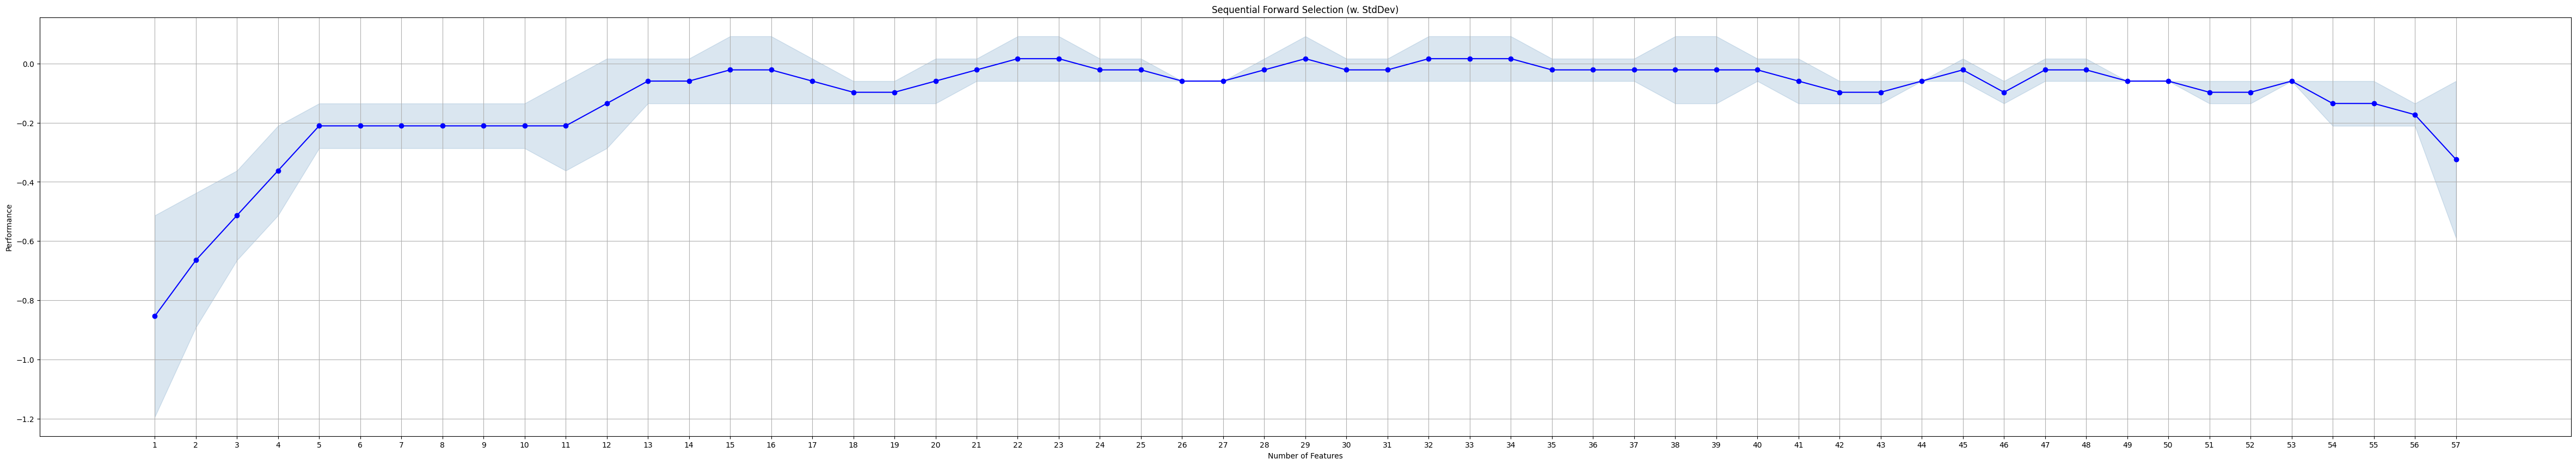

In [ ]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev',figsize = (60,10))

plt.title('Sequential Forward Selection (w. StdDev)')

plt.grid()
plt.show()

In [ ]:
data = sfs.transform(df_train.drop('target',axis = 1))

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data = data.assign(target = target)


In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,target
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.2,1.0,10.0,9.0,0.0,1.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,0.3,1.0,9.0,3.0,1.0,0.0,0
2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,1.0,0.1,2.0,9.0,4.0,1.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,3.0,1.0,0.1,4.0,7.0,2.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,1.0,0.0,2.0,6.0,3.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2.0,8.0,5.0,0.0,0.0,0
221371,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,7.0,9.0,0.0,0.0,0
221372,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.0,1.0,0.7,1.0,9.0,5.0,0.0,0.0,0
221373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.2,2.0,6.0,5.0,0.0,0.0,0


In [ ]:
train_df,cv_df = train_test_split(data,test_size = 0.2,random_state = 42)

In [ ]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,target
198820,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.2,1.0,8.0,7.0,0.0,0.0,0
40245,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,1.0,0.6,3.0,7.0,5.0,0.0,0.0,0
202781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,1.0,0.3,2.0,10.0,8.0,1.0,0.0,0
70768,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,1.0,0.1,2.0,9.0,6.0,0.0,0.0,0
171914,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.6,0.0,8.0,5.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,8.0,5.0,0.0,1.0,0
103694,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,1.0,0.4,1.0,9.0,8.0,0.0,0.0,0
131932,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,8.0,7.0,0.0,0.0,0
146867,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.1,3.0,7.0,6.0,0.0,0.0,0


In [ ]:
model_xgb.fit(train_df.drop(['target',],axis = 1),train_df['target'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
train_pred = model_xgb.predict(train_df.drop(['target'],axis = 1))
cv_pred = model_xgb.predict(cv_df.drop(['target'],axis = 1))

In [ ]:
print("accuracy on train set is =  "+str(accuracy_score(train_df['target'],train_pred)))
print("accuracy on cv set is =  " +str(accuracy_score(cv_df['target'],cv_pred)))

accuracy on train set is =  0.7993450028232637
accuracy on cv set is =  0.7724223602484472


In [ ]:
print("classification report for cv set is =  " +str(classification_report(cv_df['target'],cv_pred)))

classification report for cv set is =                precision    recall  f1-score   support

           0       0.97      0.79      0.87     42619
           1       0.05      0.29      0.09      1656

    accuracy                           0.77     44275
   macro avg       0.51      0.54      0.48     44275
weighted avg       0.93      0.77      0.84     44275



In [ ]:
gini_normalized(cv_df['target'],cv_pred)

0.08245633453950417

# Backward Elimination

In [ ]:
target = df_train.target
data = df_train.dropna(axis = 0)
data = data.head(500)

sfs = SFS(model_xgb,k_features = 'best',forward = False,floating = False,scoring = 'r2',cv = 2)

sfs.fit(data.drop(['target'],axis = 1),data['target'])


SequentialFeatureSelector(cv=2,
                          estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=None,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...),
                          forward=False, k_features=(1, 57), scoring='r2')

In [ ]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

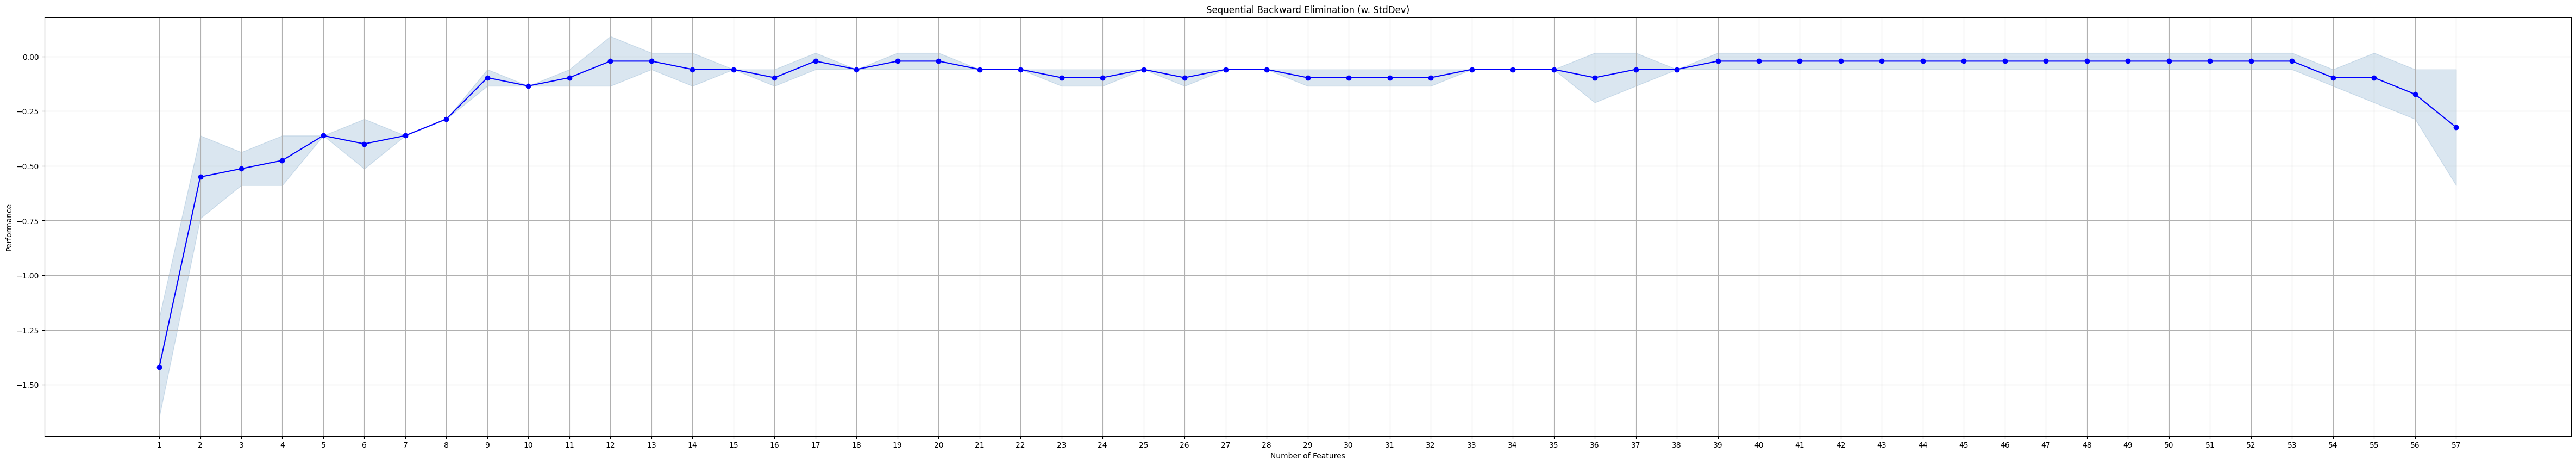

In [ ]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev',figsize = (60,10))

plt.title('Sequential Backward Elimination (w. StdDev)')

plt.grid()
plt.show()

In [ ]:
data = sfs.transform(df_train.drop('target',axis = 1))

In [ ]:
data = pd.DataFrame(data)
data = data.assign(target = target)

In [ ]:
train_df,cv_df = train_test_split(data,test_size = 0.2,random_state = 42)

In [ ]:
model_xgb.fit(train_df.drop(['target',],axis = 1),train_df['target'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
train_pred = model_xgb.predict(train_df.drop(['target'],axis = 1))
cv_pred = model_xgb.predict(cv_df.drop(['target'],axis = 1))
print("accuracy on train set is =  "+str(accuracy_score(train_df['target'],train_pred)))
print("accuracy on cv set is =  " +str(accuracy_score(cv_df['target'],cv_pred)))

accuracy on train set is =  0.8428402032749859
accuracy on cv set is =  0.8037944664031621


In [ ]:
print("classification report for cv set is =  " +str(classification_report(cv_df['target'],cv_pred)))

classification report for cv set is =                precision    recall  f1-score   support

           0       0.97      0.82      0.89     42619
           1       0.06      0.27      0.09      1656

    accuracy                           0.80     44275
   macro avg       0.51      0.55      0.49     44275
weighted avg       0.93      0.80      0.86     44275



In [ ]:
gini_normalized(cv_df['target'],cv_pred)

0.09360091828132729

# EMBEDDED METHODS

### LASSO (L1) REGULARIZATION

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
features = df_train.drop(['target'],axis = 1).columns

In [ ]:
features

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [ ]:
data = df_train.dropna(axis = 0)

In [ ]:
data

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
3,0,0,1.0,2,0.0,0.0,1,0,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,5,1.0,4,0.0,0.0,1,0,0,0,...,7.0,1.0,3.0,6.0,1.0,0.0,1.0,0.0,1.0,0.0
9,1,1,1.0,2,0.0,0.0,0,1,0,0,...,3.0,5.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0
13,0,1,1.0,3,1.0,0.0,0,1,0,0,...,2.0,0.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
17,0,5,1.0,6,0.0,1.0,1,0,0,0,...,9.0,1.0,3.0,9.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221360,1,1,2.0,2,0.0,0.0,1,0,0,0,...,9.0,2.0,3.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0
221361,0,0,2.0,2,1.0,0.0,0,0,1,0,...,10.0,2.0,1.0,9.0,0.0,1.0,1.0,1.0,0.0,0.0
221364,0,5,1.0,5,0.0,0.0,0,0,1,0,...,7.0,0.0,5.0,8.0,0.0,1.0,0.0,1.0,1.0,0.0
221366,0,0,1.0,5,0.0,0.0,1,0,0,0,...,4.0,3.0,0.0,10.0,0.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
lasso = Lasso(alpha = 0.001)
lasso.fit(data.drop('target',axis=1),data['target'])

Lasso(alpha=0.001)

In [ ]:
coeff = lasso.coef_
coeff

array([ 0.00146222, -0.        ,  0.00128557,  0.00103406,  0.00510338,
       -0.00473917,  0.00269421,  0.00261797, -0.00415779,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.00141896,
       -0.        ,  0.01303673, -0.        ,  0.        ,  0.00342428,
        0.        ,  0.00111369, -0.00261125,  0.        ,  0.00085588,
       -0.00145288,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.00028375,  0.        ,  0.        ,
        0.        ,  0.00248883,  0.        ,  0.        , -0.        ,
        0.0002251 , -0.        , -0.        , -0.        ,  0.00026648,
       -0.        ,  0.0004988 , -0.00017707, -0.        , -0.00064687,
        0.0001486 , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ])

In [ ]:
df_coeff = pd.DataFrame({"features":features,"coeff":coeff})

In [ ]:
df_coeff

,features,coeff
0,ps_ind_01,0.001462
1,ps_ind_02_cat,-0.000000
2,ps_ind_03,0.001286
3,ps_ind_04_cat,0.001034
4,ps_ind_05_cat,0.005103
5,ps_ind_06_bin,-0.004739
6,ps_ind_07_bin,0.002694
7,ps_ind_08_bin,0.002618
8,ps_ind_09_bin,-0.004158
9,ps_ind_10_bin,0.000000


In [ ]:
feature_subset=np.array(features)[coeff == 0]

In [ ]:
data.drop(feature_subset,axis =1,inplace = True)

In [ ]:
train_df,cv_df = train_test_split(data,test_size = 0.2,random_state = 42)

In [ ]:
model_xgb.fit(train_df.drop(['target',],axis = 1),train_df['target'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
train_pred = model_xgb.predict(train_df.drop(['target'],axis = 1))
cv_pred = model_xgb.predict(cv_df.drop(['target'],axis = 1))
print("accuracy on train set is =  "+str(accuracy_score(train_df['target'],train_pred)))
print("accuracy on cv set is =  " +str(accuracy_score(cv_df['target'],cv_pred)))

accuracy on train set is =  0.8851360407452085
accuracy on cv set is =  0.8175190307708803


In [ ]:
print("classification report for cv set is =  " +str(classification_report(cv_df['target'],cv_pred)))

classification report for cv set is =                precision    recall  f1-score   support

           0       0.96      0.85      0.90      8904
           1       0.06      0.19      0.09       423

    accuracy                           0.82      9327
   macro avg       0.51      0.52      0.49      9327
weighted avg       0.92      0.82      0.86      9327



In [ ]:
gini_normalized(cv_df['target'],cv_pred)

0.05798493624667845

### RIDGE(L2) REGULARIZATION

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
features = df_train.drop(['target'],axis = 1).columns

In [ ]:
data = df_train.dropna(axis = 0)

In [ ]:
ridge = Ridge(alpha = 0.001)
ridge.fit(data.drop('target',axis=1),data['target'])

Ridge(alpha=0.001)

In [ ]:
coeff = ridge.coef_
coeff

array([ 1.00316676e-03, -2.69133186e-04,  1.64940943e-03,  6.29336919e-03,
        5.52175690e-03, -4.48876640e-03,  4.53568940e-03,  8.17130472e-03,
       -8.21822818e-03,  1.35905846e-02, -1.10971669e-02,  7.90113391e-03,
       -1.27360189e-02, -2.34146827e-03, -1.33500495e-03, -3.54239698e-03,
        1.41968136e-02, -5.30852039e-03,  1.95404632e-03,  3.67096263e-03,
        5.78707308e-03,  8.83358156e-04,  1.63823016e-04, -4.57274708e-04,
       -7.68312755e-04, -5.80649277e-03, -1.67933592e-04, -1.84331799e-02,
       -6.39558894e-04, -8.06634119e-04, -4.81131074e-03, -2.55426658e-05,
       -2.39154589e-03,  1.83531878e-02,  3.41512270e-02, -7.60186312e-03,
       -1.65085979e-03,  9.63358588e-04,  9.78948742e-04, -2.82124923e-03,
        9.78127983e-04, -5.33693310e-04, -3.09846973e-04, -3.74300211e-04,
        7.45541406e-04, -3.58791187e-04,  6.44158870e-04, -3.22856099e-04,
        2.41094632e-05, -9.82137073e-04,  2.83287670e-04, -4.32931539e-04,
        1.43987589e-03, -

In [ ]:
df_coeff = pd.DataFrame({"features":features,"coeff":coeff})

In [ ]:
df_coeff.sort_values(by = 'coeff',ascending = False)

,features,coeff
34,ps_car_13,0.034151
33,ps_car_12,0.018353
16,ps_ind_17_bin,0.014197
9,ps_ind_10_bin,0.013591
7,ps_ind_08_bin,0.008171
11,ps_ind_12_bin,0.007901
3,ps_ind_04_cat,0.006293
20,ps_reg_03,0.005787
4,ps_ind_05_cat,0.005522
6,ps_ind_07_bin,0.004536


# Tree-based feature importance
Random Forest feature importance

In [ ]:
df_train

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2.0,5,1.0,0.0,0,1,0,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0,1,1.0,7,0.0,0.0,0,0,1,0,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0,5,4.0,9,1.0,0.0,0,0,1,0,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0,0,1.0,2,0.0,0.0,1,0,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,2.0,0,1.0,0.0,1,0,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221370,0,0,1.0,2,0.0,0.0,1,0,0,0,...,5.0,0.0,3.0,11.0,0.0,1.0,1.0,0.0,0.0,0.0
221371,0,1,2.0,1,1.0,0.0,0,1,0,0,...,9.0,1.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
221372,0,5,1.0,2,1.0,0.0,0,0,1,0,...,5.0,1.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0
221373,0,0,1.0,2,0.0,0.0,1,0,0,0,...,5.0,3.0,2.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
data = df_train.dropna(axis=0)

In [ ]:
X = data.drop('target',axis =1 )
y = data.target

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size = 0.2, random_state = 42)
forest_model = RandomForestClassifier(n_estimators = 150, random_state=42)
forest_model.fit(train_X, train_y)
target = forest_model.predict(val_X)
#Random Forest Importance
feature_importances = forest_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
#print(mean_absolute_error(val_y, target))
#print(target)
print(importance_df)
print(accuracy_score(val_y,target))
conf_matrix = confusion_matrix(target, val_y)
print('Confusion Matrix:')
print(conf_matrix)

# Display classification report
class_report = classification_report(target, val_y)
print('Classification Report:')
print(class_report)

           Feature  Importance
20       ps_reg_03    0.055527
34       ps_car_13    0.054307
35       ps_car_14    0.038728
46      ps_calc_10    0.037206
50      ps_calc_14    0.034102
47      ps_calc_11    0.033268
14       ps_ind_15    0.031863
19       ps_reg_02    0.031457
37      ps_calc_01    0.030340
2        ps_ind_03    0.030150
49      ps_calc_13    0.029582
38      ps_calc_02    0.029457
39      ps_calc_03    0.029415
31   ps_car_11_cat    0.029012
44      ps_calc_08    0.027605
43      ps_calc_07    0.027345
42      ps_calc_06    0.026497
36       ps_car_15    0.026452
45      ps_calc_09    0.026441
41      ps_calc_05    0.025383
26   ps_car_06_cat    0.024427
40      ps_calc_04    0.023925
0        ps_ind_01    0.023585
33       ps_car_12    0.022885
48      ps_calc_12    0.022589
18       ps_reg_01    0.020959
21   ps_car_01_cat    0.017378
29   ps_car_09_cat    0.013313
1    ps_ind_02_cat    0.011758
32       ps_car_11    0.011706
4    ps_ind_05_cat    0.010516
53  ps_c

# Hierarchical Clustering for Feature Selection

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
data = df_train.dropna(axis = 0)

In [ ]:
df_transposed = data.drop(['target'],axis = 1).T

In [ ]:
df_transposed

,3,7,9,13,17,22,34,45,48,50,...,221337,221355,221356,221357,221358,221360,221361,221364,221366,221367
ps_ind_01,0.000000,5.000000,1.000000,1.000000,5.000000,5.000000,0.000000,1.000000,2.000000,3.000000,...,5.000000,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,5.000000,0.000000,5.000000
ps_ind_02_cat,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000
ps_ind_03,2.000000,4.000000,2.000000,3.000000,6.000000,6.000000,1.000000,6.000000,6.000000,2.000000,...,6.000000,1.000000,6.000000,4.000000,3.000000,2.000000,2.000000,5.000000,5.000000,9.000000
ps_ind_04_cat,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
ps_ind_05_cat,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_06_bin,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
ps_ind_07_bin,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_08_bin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
ps_ind_09_bin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
ps_ind_10_bin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
linked = linkage(df_transposed, 'ward',metric = 'euclidean')

In [ ]:
df_linked = pd.DataFrame(linked,
                         columns = ['c1','c2','distance','size'])
df_linked[['c1','c2','size']] = df_linked[['c1','c2','size']].astype(int)

df_linked

,c1,c2,distance,size
0,9,12,13.747727,2
1,33,35,13.941349,2
2,10,57,18.912077,3
3,11,13,23.345235,2
4,27,30,53.169540,2
5,59,60,61.575428,5
6,34,61,67.462959,3
7,38,58,76.013936,3
8,39,64,82.164369,4
9,37,65,84.349424,5


Text(0, 0.5, 'Distance')

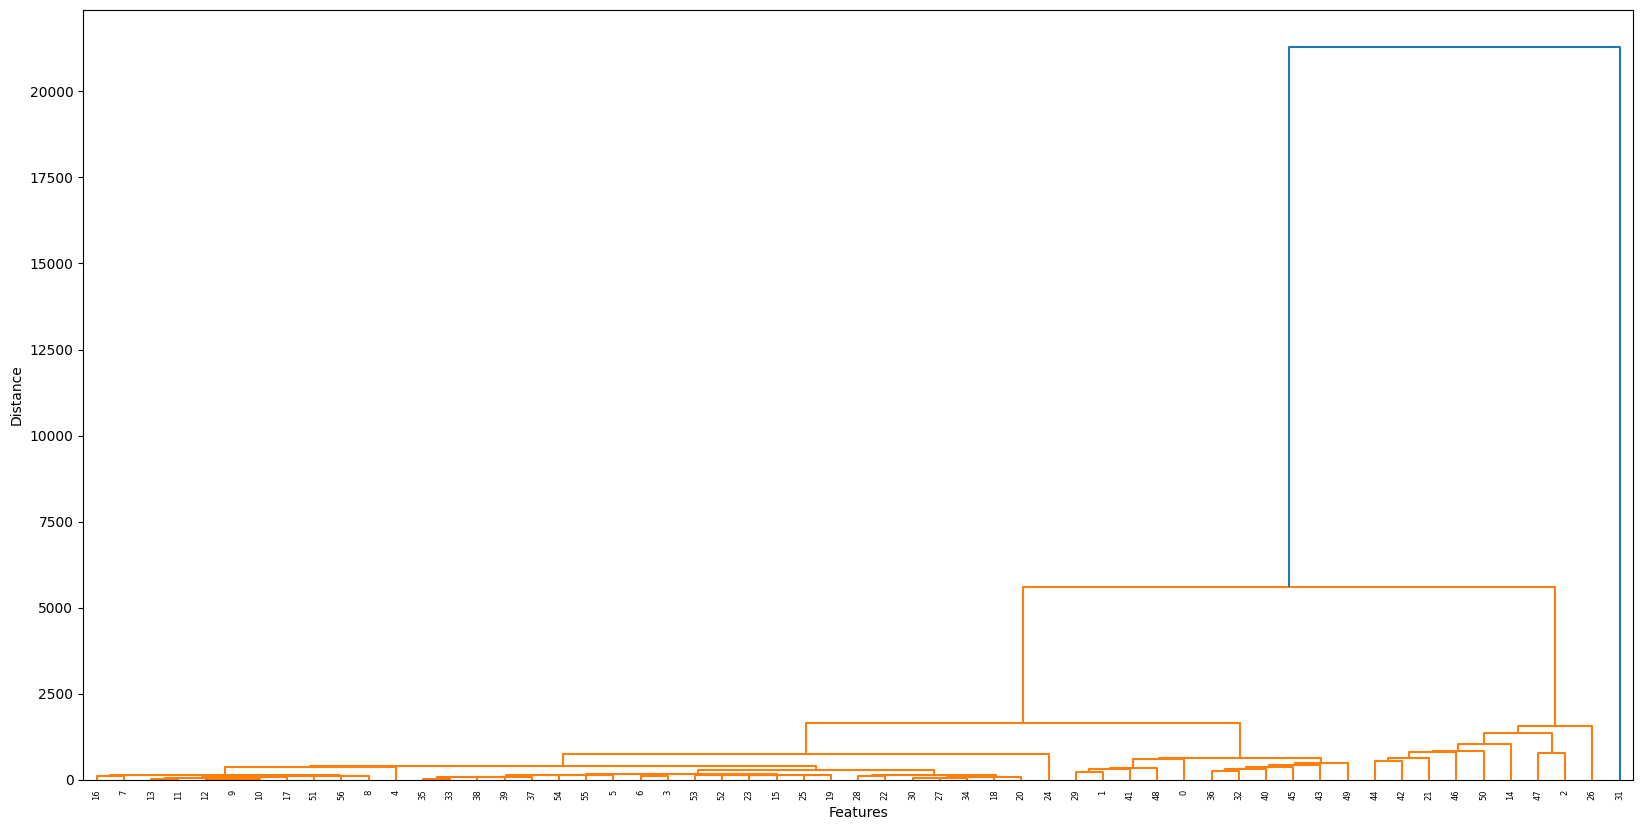

In [ ]:
plt.figure(figsize = (20,10))
dendrogram(linked,
           orientation = 'top',
           distance_sort = 'descending',
           show_leaf_counts = True)

plt.xlabel('Features')
plt.ylabel('Distance')

In [ ]:
num_clusters = 10
labels = fcluster(linked, t = num_clusters, criterion='maxclust')

In [ ]:
correlations = []
for col in df_train.drop('target',axis =1).columns:
    corr = df_train['target'].corr(df_train[col])
    corr= round(corr, 3)
    correlations.append(corr)

In [ ]:
df_clusters = pd.DataFrame({'Feature': df_train.drop('target',axis =1).columns, 'Cluster': labels, 'Correlation': correlations })
df_clusters['Absolute Correlation'] = df_clusters['Correlation'].abs()
df_clusters = df_clusters.sort_values(by='Absolute Correlation', ascending=False)

In [ ]:
df_clusters

,Feature,Cluster,Correlation,Absolute Correlation
34,ps_car_13,9,0.053,0.053
33,ps_car_12,9,0.037,0.037
16,ps_ind_17_bin,9,0.036,0.036
5,ps_ind_06_bin,9,-0.035,0.035
4,ps_ind_05_cat,9,0.034,0.034
20,ps_reg_03,9,0.034,0.034
19,ps_reg_02,9,0.034,0.034
6,ps_ind_07_bin,9,0.033,0.033
24,ps_car_04_cat,9,0.032,0.032
22,ps_car_02_cat,9,-0.031,0.031


# Forming Submission

In [ ]:
df_test

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892811,1488022,0,1,6,0,0,0,1,0,0,...,4,2,3,4,0,1,0,0,1,0
892812,1488023,5,3,5,1,0,0,0,1,0,...,6,2,2,11,0,0,1,1,0,0
892813,1488024,0,1,5,0,0,1,0,0,0,...,5,2,2,11,0,1,1,0,0,0
892814,1488025,6,1,5,1,0,0,0,0,1,...,1,1,2,7,1,1,0,0,0,0


In [ ]:
df_test_id = df_test['id']

In [ ]:
del df_test['id']

In [ ]:
model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
model_xgb.fit(df_train.drop(['target'],axis = 1),df_train['target'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
data

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_15,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2.0,5,1.0,0.0,0,1,0,0,11,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1,1.0,7,0.0,0.0,0,0,1,0,3,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,5,4.0,9,1.0,0.0,0,0,1,0,12,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0,1.0,2,0.0,0.0,1,0,0,0,8,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2.0,0,1.0,0.0,1,0,0,0,9,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221370,0,1.0,2,0.0,0.0,1,0,0,0,7,...,5.0,0.0,3.0,11.0,0.0,1.0,1.0,0.0,0.0,0.0
221371,1,2.0,1,1.0,0.0,0,1,0,0,11,...,9.0,1.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
221372,5,1.0,2,1.0,0.0,0,0,1,0,11,...,5.0,1.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0
221373,0,1.0,2,0.0,0.0,1,0,0,0,12,...,5.0,3.0,2.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
data.drop(constant_columns,axis =1,inplace = True)

In [ ]:
df_test.drop(constant_columns,axis =1,inplace = True)

In [ ]:
model_xgb.fit(data,df_train['target'])

XGBClassifier(base_score=None, booster=None, callbacks=None, class_weight=25,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
test_pred = model_xgb.predict(df_test)

In [ ]:
df_submission = pd.DataFrame({'id':df_test_id,'target':test_pred})

In [ ]:
df_submission.to_csv('submission.csv',index = False)